In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\FlavorSense.csv")
df.head()

,age,sleep_cycle,exercise_habits,climate_zone,historical_cuisine_exposure,preferred_taste
0,56.0,Irregular,Heavy,Temperate,NaN,Salty
1,NaN,Night Owl,Heavy,Temperate,Asian,Sweet
2,46.0,Night Owl,Heavy,Cold,Mixed,Sour
3,32.0,Early Bird,Heavy,Cold,Mediterranean,Salty
4,60.0,Night Owl,Moderate,Dry,Mediterranean,Sour


# DATA CLEANING

In [3]:
# Check thhe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          9032 non-null   float64
 1   sleep_cycle                  9316 non-null   object 
 2   exercise_habits              9196 non-null   object 
 3   climate_zone                 9467 non-null   object 
 4   historical_cuisine_exposure  9346 non-null   object 
 5   preferred_taste              10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB


In [4]:
# Check the unique values in each categorical column
sleep_cycle = df['sleep_cycle'].unique()
exercise_habits = df['exercise_habits'].unique()
climate_zone = df['climate_zone'].unique()
historical_cuisine_exposure = df['historical_cuisine_exposure'].unique()
preferred_taste = df['preferred_taste'].unique()

print(f'sleep_cycle :{sleep_cycle}')
print(f'exercise_habits :{exercise_habits}')
print(f'climate_zone :{climate_zone}')
print(f'historical_cuisine_exposure :{historical_cuisine_exposure}')
print(f'preferred_taste :{preferred_taste}')

sleep_cycle :['Irregular' 'Night Owl' 'Early Bird' nan]
exercise_habits :['Heavy' 'Moderate' 'Light' nan]
climate_zone :['Temperate' 'Cold' 'Dry' 'Tropical' nan]
historical_cuisine_exposure :[nan 'Asian' 'Mixed' 'Mediterranean']
preferred_taste :['Salty' 'Sweet' 'Sour' 'Spicy']


In [5]:
df.sleep_cycle.value_counts()

sleep_cycle
Early Bird    3149
Irregular     3085
Night Owl     3082
Name: count, dtype: int64

In [6]:
df.climate_zone.value_counts()

climate_zone
Tropical     2443
Dry          2382
Cold         2364
Temperate    2278
Name: count, dtype: int64

In [7]:
df.exercise_habits.value_counts()

exercise_habits
Moderate    3106
Heavy       3064
Light       3026
Name: count, dtype: int64

In [8]:
df.historical_cuisine_exposure.value_counts()

historical_cuisine_exposure
Mediterranean    3157
Mixed            3123
Asian            3066
Name: count, dtype: int64

In [9]:
# fill the missing values with mean in age column
df['age'] = df['age'].fillna(df['age'].mean()).infer_objects(copy=False)

In [10]:
# fill the missing values in the categorical columns with mode

df['sleep_cycle'] = df['sleep_cycle'].fillna(df['sleep_cycle'].mode().iloc[0])
df['exercise_habits'] = df['exercise_habits'].fillna(df['exercise_habits'].mode().iloc[0])
df['climate_zone'] = df['climate_zone'].fillna(df['climate_zone'].mode().iloc[0])
df['historical_cuisine_exposure'] = df['historical_cuisine_exposure'].fillna(df['historical_cuisine_exposure'].mode().iloc[0])

In [11]:
df.isnull().sum()

age                            0
sleep_cycle                    0
exercise_habits                0
climate_zone                   0
historical_cuisine_exposure    0
preferred_taste                0
dtype: int64

In [12]:
# Convert categorical columns to numerical using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ['sleep_cycle', 'exercise_habits', 'climate_zone','historical_cuisine_exposure','preferred_taste']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   # store encoder



In [13]:
# check how each values are encoded
label_encoders['preferred_taste'].classes_


array(['Salty', 'Sour', 'Spicy', 'Sweet'], dtype=object)

In [14]:
label_encoders['sleep_cycle'].classes_


array(['Early Bird', 'Irregular', 'Night Owl'], dtype=object)

In [15]:
label_encoders['exercise_habits'].classes_

array(['Heavy', 'Light', 'Moderate'], dtype=object)

In [16]:
label_encoders['climate_zone'].classes_

array(['Cold', 'Dry', 'Temperate', 'Tropical'], dtype=object)

In [17]:
label_encoders['historical_cuisine_exposure'].classes_

array(['Asian', 'Mediterranean', 'Mixed'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          10000 non-null  float64
 1   sleep_cycle                  10000 non-null  int64  
 2   exercise_habits              10000 non-null  int64  
 3   climate_zone                 10000 non-null  int64  
 4   historical_cuisine_exposure  10000 non-null  int64  
 5   preferred_taste              10000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


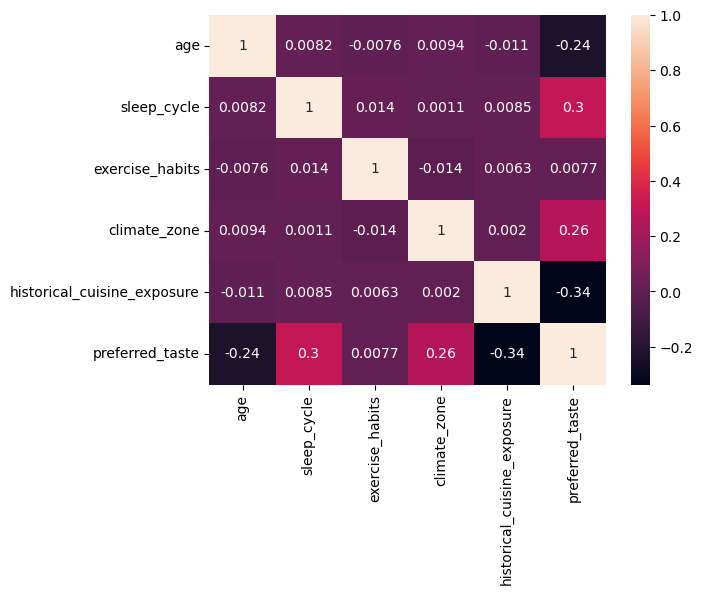

In [19]:
# Check the correlation between each variable
corr = df.corr()
sns.heatmap(corr,annot = True)
plt.show()

In [20]:
# Drop the column which has very week correlation
df.drop('exercise_habits',axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

## Target Distribution

### Count Plot

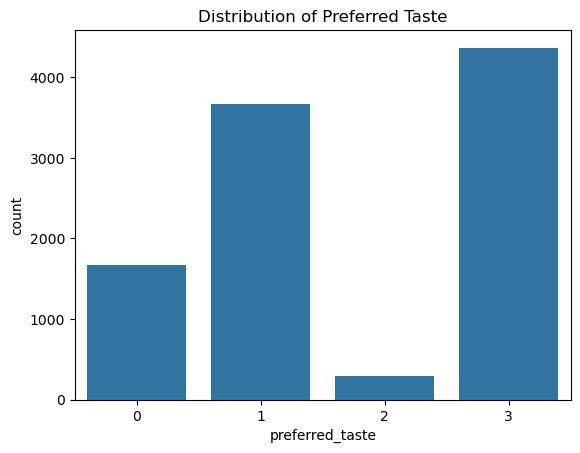

In [21]:
sns.countplot(x='preferred_taste', data=df)
plt.title("Distribution of Preferred Taste")

plt.show()

<p>Since sweet dominates, the dataset is imbalanced for the preferred_taste feature. This imbalance may influence classification models, making them biased toward predicting sweet more frequently. Techniques such as class weighting or stratified sampling may be required if preferred taste is used as a target variable.</p>

## Bivariate Analysis

### Box Plot

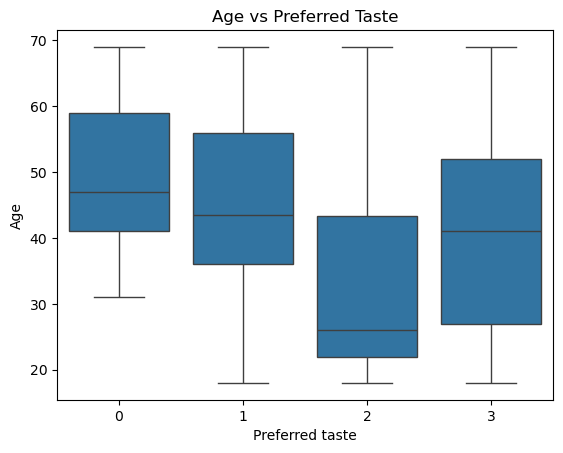

In [22]:
sns.boxplot(x='preferred_taste', y='age', data=df)
plt.xlabel('Preferred taste')
plt.ylabel('Age')
plt.title('Age vs Preferred Taste')
plt.show()

<p>Age may serve as an important predictive feature for modeling taste preference. Since age distributions differ across categories, this feature could improve classification performance.</p>

### Grouped Count Plot

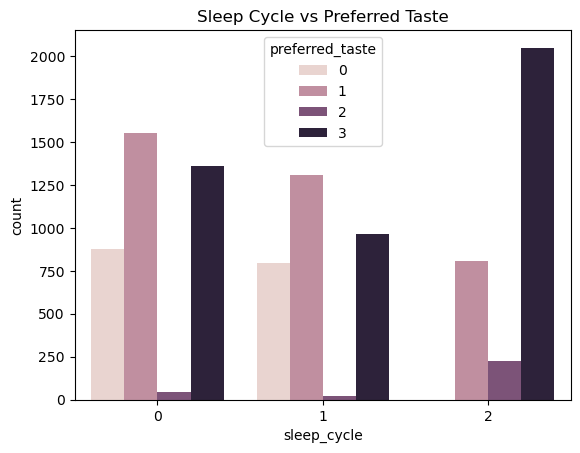

In [23]:
sns.countplot(x='sleep_cycle', hue='preferred_taste', data=df)
plt.title('Sleep Cycle vs Preferred Taste')
plt.show()

<p>sleep_cycle appears to be a useful predictive feature for modeling preferred_taste. The uneven distribution across sleep cycles indicates possible feature–target interaction. Since some taste categories dominate certain sleep cycles, class imbalance handling may be necessary.</p>

### Grouped Bar Chart

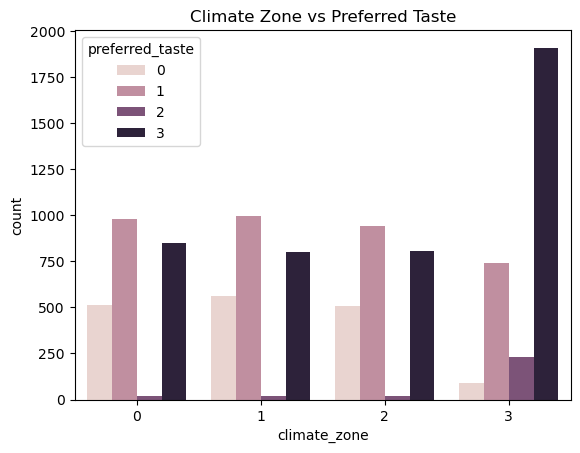

In [24]:
sns.countplot(x='climate_zone', hue='preferred_taste', data=df)
plt.title('Climate Zone vs Preferred Taste')
plt.show()

<p>The chart indicates that Tropical Climate Zone is a strong predictor for Preferred Spice, showing a massive spike compared to other zones. This suggests that the model should prioritize "Climate Zone" as a high-importance feature, particularly for identifying Spice.
In contrast, Zones Cold, Dry and Temperate exhibit very similar distributions between tastes sour and sweet, which may require the model to leverage additional features to distinguish preferences in those specific regions.</p>

## Multivariate Analysis

### Violin Plot

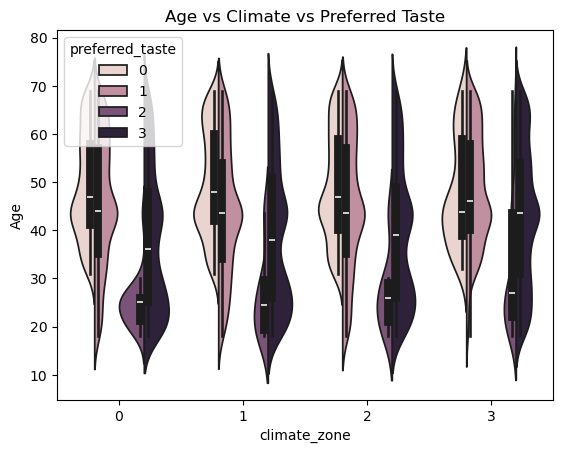

In [25]:
sns.violinplot(x='climate_zone', y='age', hue='preferred_taste', data=df, split=True)
plt.xlabel('climate_zone')
plt.ylabel('Age')
plt.title('Age vs Climate vs Preferred Taste')
plt.show()

<p>The interaction between age and climate_zone could be valuable for feature engineering. Since distributions vary across climates, tree-based models (Random Forest, XGBoost) are well-suited to capture these nonlinear relationships.</p>

## TRAIN TEST SPLIT

In [26]:
X = df.drop('preferred_taste',axis = 1)
X.head()

,age,sleep_cycle,climate_zone,historical_cuisine_exposure
0,56.000000,1,2,1
1,43.552702,2,2,0
2,46.000000,2,0,2
3,32.000000,0,0,1
4,60.000000,2,1,1


In [27]:
y = df['preferred_taste']
y.head()

0    0
1    3
2    1
3    0
4    1
Name: preferred_taste, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [29]:
X_train.head()

,age,sleep_cycle,climate_zone,historical_cuisine_exposure
6604,48.000000,1,0,1
3203,54.000000,1,1,0
2195,40.000000,2,3,0
2576,43.552702,1,3,2
4572,43.552702,1,2,0


# MODELLING

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=2000)
modelLR.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred =modelLR.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_pred))

Accuracy: 0.644
Confusion Matrix:
 [[223 107   0   4]
 [124 406   0 200]
 [  0   0  26  31]
 [  9 216  21 633]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       334
           1       0.56      0.56      0.56       730
           2       0.55      0.46      0.50        57
           3       0.73      0.72      0.72       879

    accuracy                           0.64      2000
   macro avg       0.62      0.60      0.61      2000
weighted avg       0.64      0.64      0.64      2000



## DecisionTree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Create the model
modelDTC = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# 2️⃣ Train the model
modelDTC.fit(X_train, y_train)

# 3️⃣ Make predictions
y_pred = modelDTC.predict(X_test)

# 4️⃣ Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Accuracy: 0.71

Confusion Matrix:
 [[321  13   0   0]
 [173 524   0  33]
 [  0   1  17  39]
 [ 14 304   3 558]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.96      0.76       334
           1       0.62      0.72      0.67       730
           2       0.85      0.30      0.44        57
           3       0.89      0.63      0.74       879

    accuracy                           0.71      2000
   macro avg       0.75      0.65      0.65      2000
weighted avg       0.75      0.71      0.71      2000



## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(
    n_estimators=200,                        # Number of decision trees in the forest
    max_depth=10,                            # Limits tree depth → reduces overfitting
    min_samples_split=10,                    # Minimum samples needed to split a node
    min_samples_leaf=5,                      # Minimum samples in a leaf node
    max_features='sqrt',                     # Number of features considered at each split
    bootstrap=True,                          # Each tree trained on a random sample (with replacement)
    class_weight='balanced',                 # Adjusts importance of classes, balances weights
    n_jobs=-1,                               # Uses all CPU cores
    random_state=42                          # Controls randomness
)

model_RFC.fit(X_train, y_train)

y_pred = model_RFC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.673


<P>The objective of this project was to predict/classify Preferred taste using FlavorSense.csv and identify the most suitable machine learning model. Models including Logistic Regression, Decision Tree and Random Forest Classifier were trained and evaluated. Models were evaluated using accuracy on the test dataset. Among all models, the Decision Tree Classifier achieved the highest accuracy of 71%.</P>